# 1. Importing Libraries and Reading the data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')

In [4]:
wine_df = pd.read_csv(r'C:\Users\Arun\OneDrive\Desktop\new project- datatrained/winequality-red.csv')

# 2. Basic EDA

In [5]:
wine_df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [6]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
# Print the names of the columns
col_name = wine_df.columns
print(col_name)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [8]:
wine_df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [9]:
wine_df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

#### 1) There are 1599 rows and 12 columns


#### 2) Except quality every other variable is float type and quality is integer.

# 2. Missing Values

In [10]:
wine_df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [11]:
# the number of unique values in the dataframe
wine_df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [12]:
wine_df.count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

In [13]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

   -  <b>To conclude there are no other missing values in the form of -- or any other form.<b>
   - <b> Next, let's visualize the data to confirm the above statement<b>

# 3.Visualization of data

In [14]:
!pip install plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [15]:
#get the shape of the dataframe
wine_df.shape

(1599, 12)

In [16]:
#get the heatmap of the missing values.
px.imshow(img = wine_df.isna(), title='Missing values(yellow: missing, blue: not missing)')

# 4. Outlier Detection

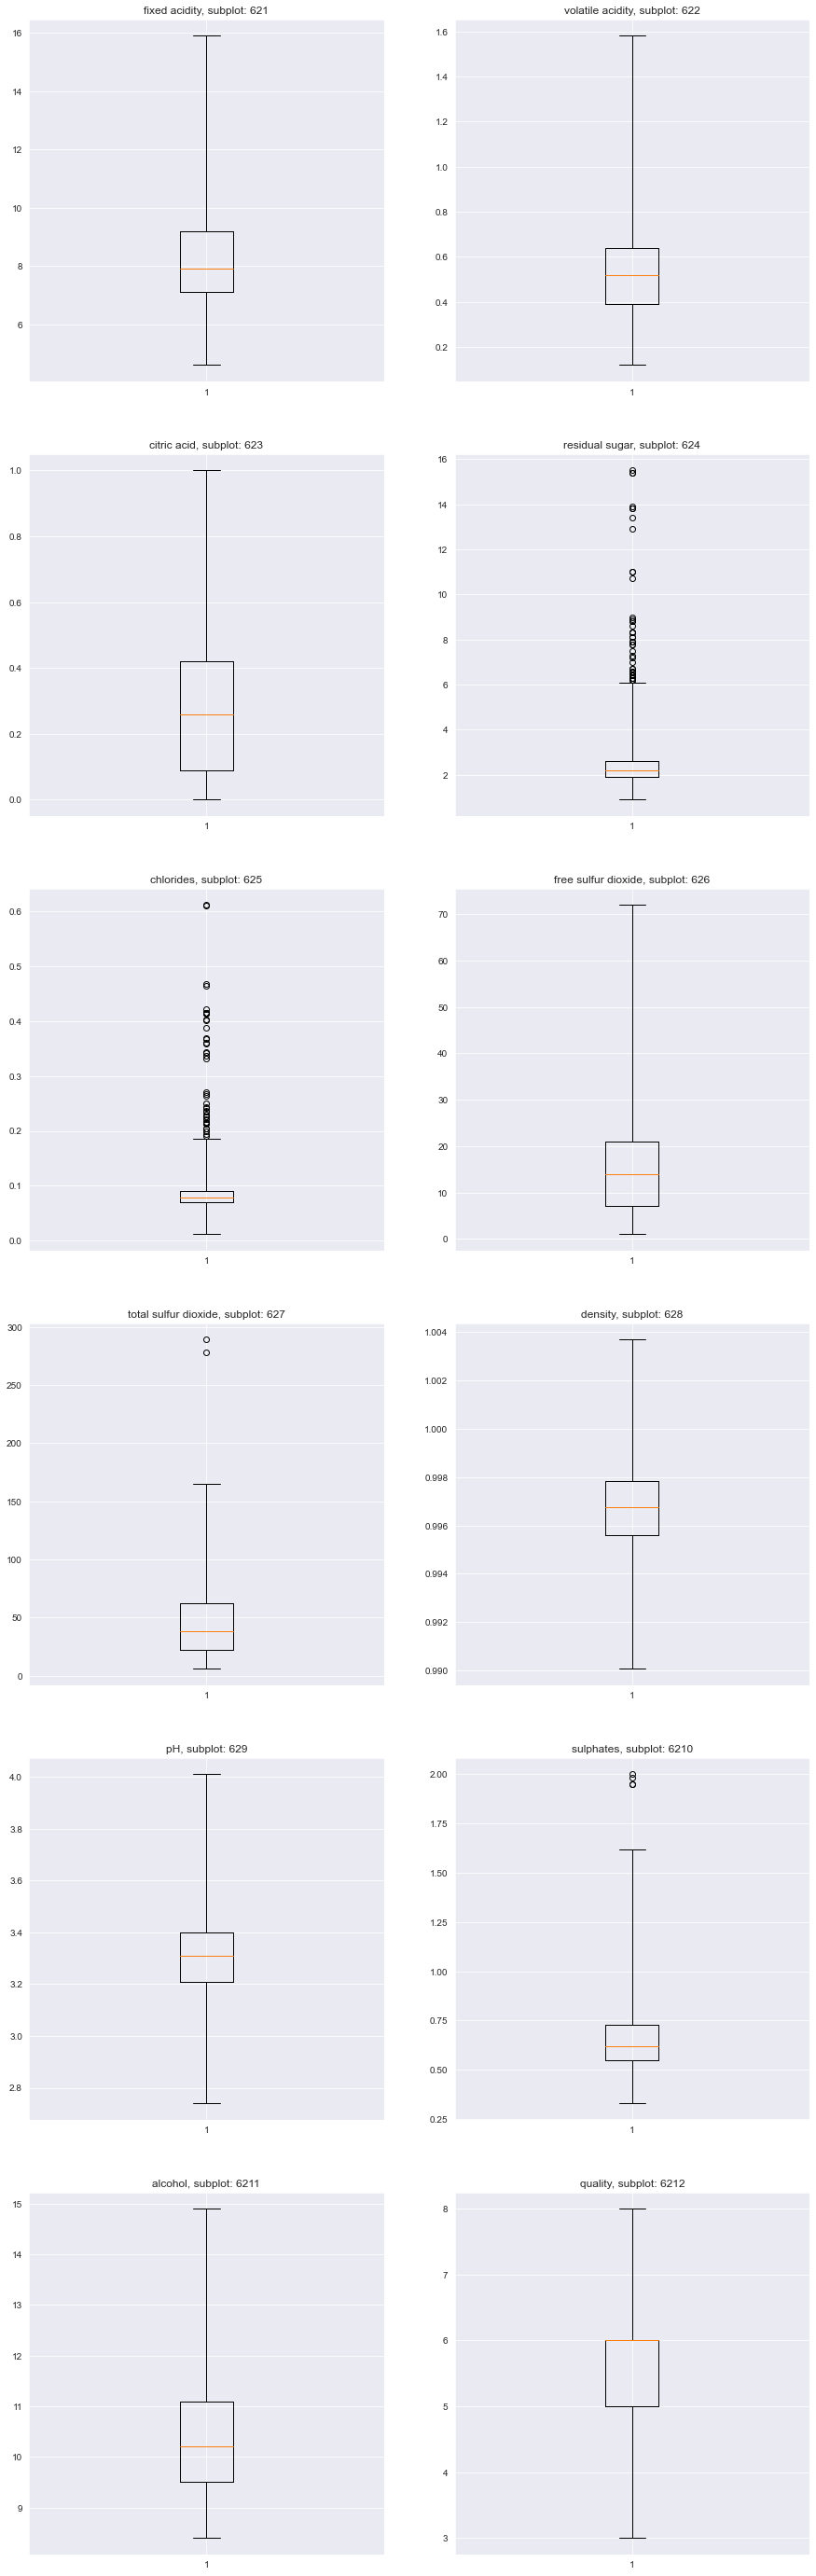

In [17]:
# Plot bloxplots for the following variables


#  Categorical Data
a = 6  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter


plt.figure(figsize = (15,50))
for i in col_name:
    plt.subplot(a, b, c)
    plt.boxplot(wine_df[i], whis = 5)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    #plt.title("Box plot of Year")
    c = c + 1
plt.show()

In [18]:
# Calculate number of outliers and its percentage in each variable using Tukey's method.


# NumPy's `percentile()` method returns the 
# values of the given percentiles. In this case,
# give `75` and `25` as parameters, which corresponds 
# to the third and the first quartiles.
threshold = 1.5
for var in wine_df:
    q75, q25 = np.percentile(wine_df[var], [75 ,25])
    iqr = q75 - q25
    
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("Number of outliers and its percentage in {} is: {} and {} percent".format(var,
        len((np.where((wine_df[var] > max_val) 
                      | (wine_df[var] < min_val))[0])),
        len((np.where((wine_df[var] > max_val) 
                      | (wine_df[var] < min_val))[0]))*100/1599
    ))

Number of outliers and its percentage in fixed acidity is: 49 and 3.0644152595372107 percent
Number of outliers and its percentage in volatile acidity is: 19 and 1.1882426516572857 percent
Number of outliers and its percentage in citric acid is: 1 and 0.06253908692933083 percent
Number of outliers and its percentage in residual sugar is: 155 and 9.693558474046279 percent
Number of outliers and its percentage in chlorides is: 112 and 7.004377736085053 percent
Number of outliers and its percentage in free sulfur dioxide is: 30 and 1.876172607879925 percent
Number of outliers and its percentage in total sulfur dioxide is: 55 and 3.4396497811131956 percent
Number of outliers and its percentage in density is: 45 and 2.8142589118198873 percent
Number of outliers and its percentage in pH is: 35 and 2.188868042526579 percent
Number of outliers and its percentage in sulphates is: 59 and 3.689806128830519 percent
Number of outliers and its percentage in alcohol is: 13 and 0.8130081300813008 perc

In [19]:
print(col_name)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


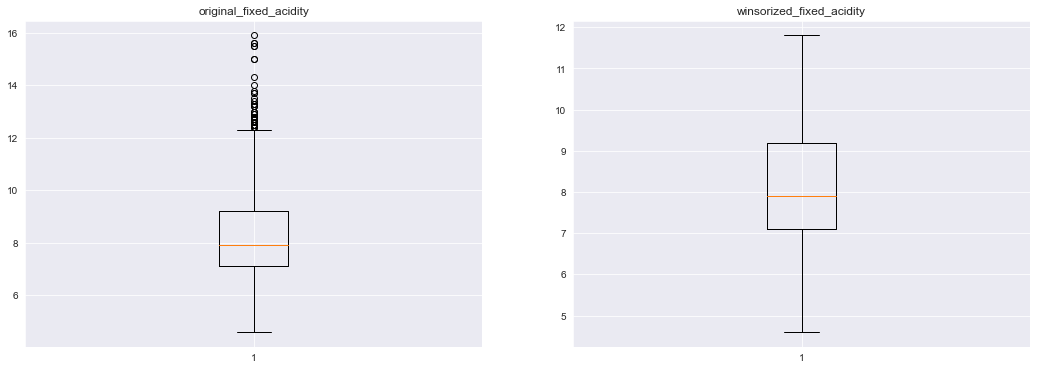

In [20]:
from scipy.stats.mstats import winsorize

plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_fixed_acidity = wine_df['fixed acidity']
plt.boxplot(original_fixed_acidity)
plt.title("original_fixed_acidity")

plt.subplot(1,2,2)
winsorized_fixed_acidity= winsorize(wine_df['fixed acidity'], (0.0, 0.05))
plt.boxplot(winsorized_fixed_acidity)
plt.title("winsorized_fixed_acidity")

plt.show()

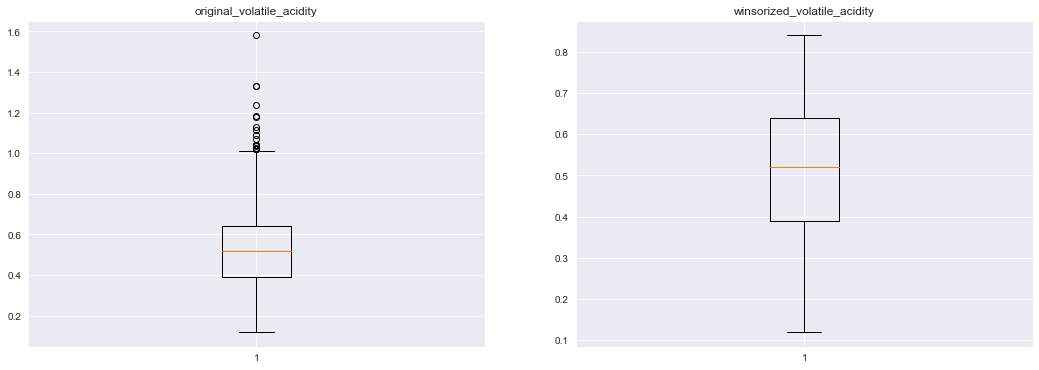

In [21]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_volatile_acidity = wine_df['volatile acidity']
plt.boxplot(original_volatile_acidity)
plt.title("original_volatile_acidity")

plt.subplot(1,2,2)
winsorized_volatile_acidity= winsorize(wine_df['volatile acidity'], (0.0, 0.05))
plt.boxplot(winsorized_volatile_acidity)
plt.title("winsorized_volatile_acidity")

plt.show()

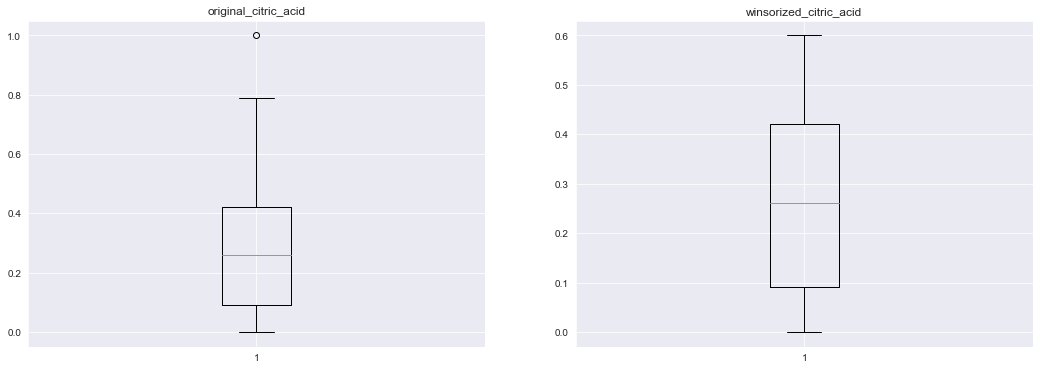

In [22]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_citric_acid = wine_df['citric acid']
plt.boxplot(original_citric_acid)
plt.title("original_citric_acid")

plt.subplot(1,2,2)
winsorized_citric_acid = winsorize(wine_df['citric acid'], (0.0, 0.05))
plt.boxplot(winsorized_citric_acid)
plt.title("winsorized_citric_acid")

plt.show()

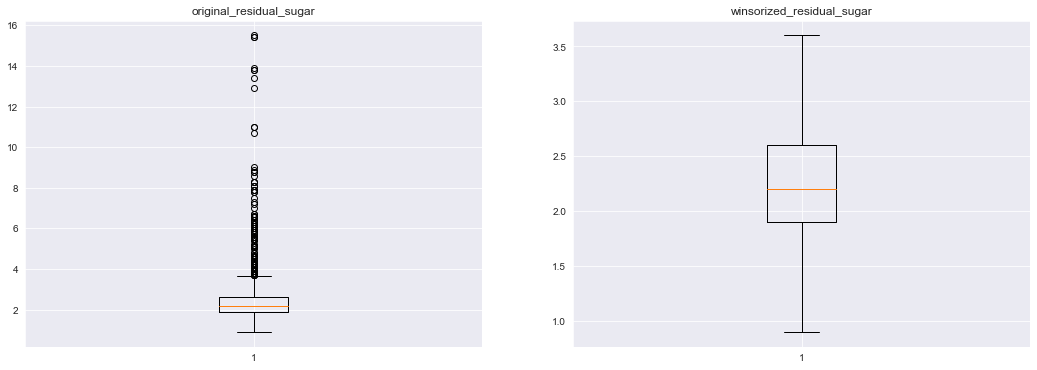

In [23]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_residual_sugar = wine_df['residual sugar']
plt.boxplot(original_residual_sugar)
plt.title("original_residual_sugar")

plt.subplot(1,2,2)
winsorized_residual_sugar = winsorize(wine_df['residual sugar'], (0.0, 0.1))
plt.boxplot(winsorized_residual_sugar)
plt.title("winsorized_residual_sugar")

plt.show()

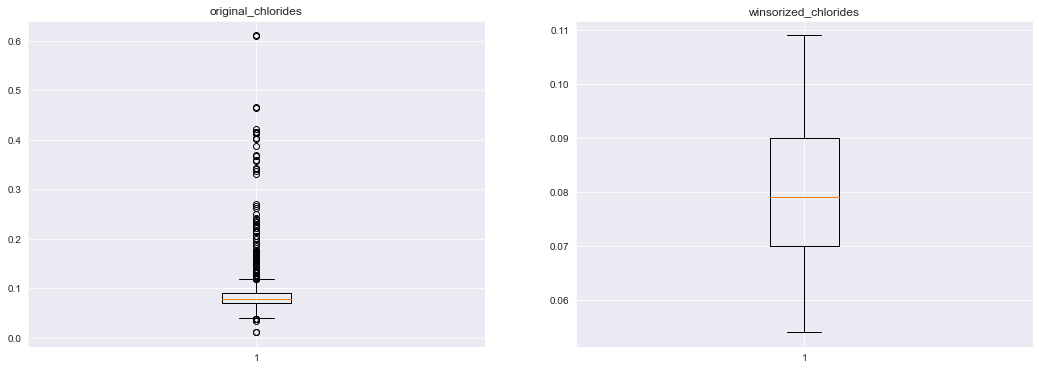

In [24]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_chlorides = wine_df['chlorides']
plt.boxplot(original_chlorides)
plt.title("original_chlorides")

plt.subplot(1,2,2)
winsorized_chlorides = winsorize(wine_df['chlorides'], (0.05, 0.1))
plt.boxplot(winsorized_chlorides)
plt.title("winsorized_chlorides")

plt.show()

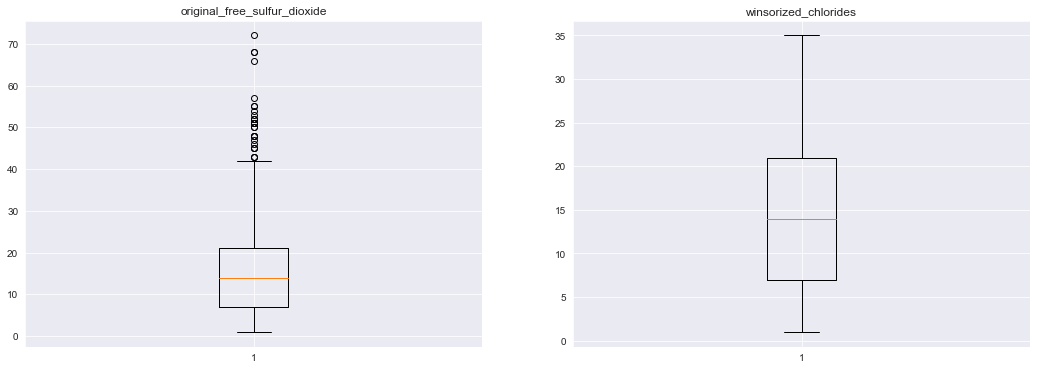

In [25]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_free_sulfur_dioxide = wine_df['free sulfur dioxide']
plt.boxplot(original_free_sulfur_dioxide)
plt.title("original_free_sulfur_dioxide")

plt.subplot(1,2,2)
winsorized_free_sulfur_dioxide = winsorize(wine_df['free sulfur dioxide'], (0.0, 0.05))
plt.boxplot(winsorized_free_sulfur_dioxide)
plt.title("winsorized_chlorides")

plt.show()

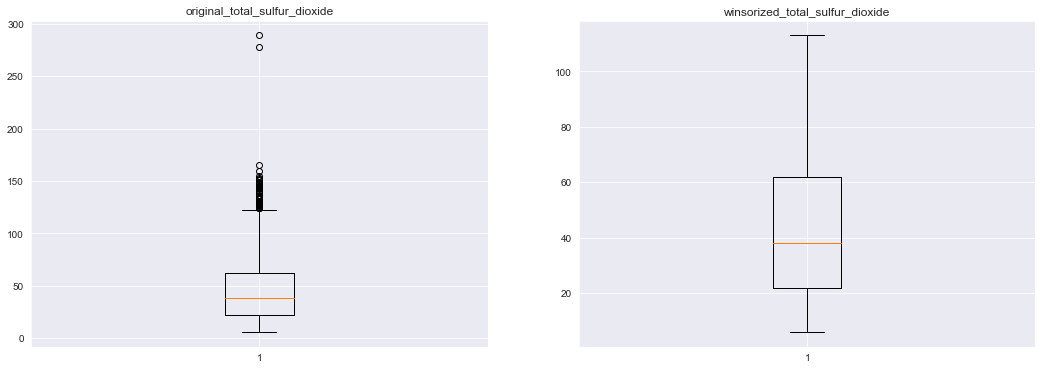

In [26]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_total_sulfur_dioxide = wine_df['total sulfur dioxide']
plt.boxplot(original_total_sulfur_dioxide)
plt.title("original_total_sulfur_dioxide")

plt.subplot(1,2,2)
winsorized_total_sulfur_dioxide = winsorize(wine_df['total sulfur dioxide'], (0.0, 0.05))
plt.boxplot(winsorized_total_sulfur_dioxide)
plt.title("winsorized_total_sulfur_dioxide")

plt.show()

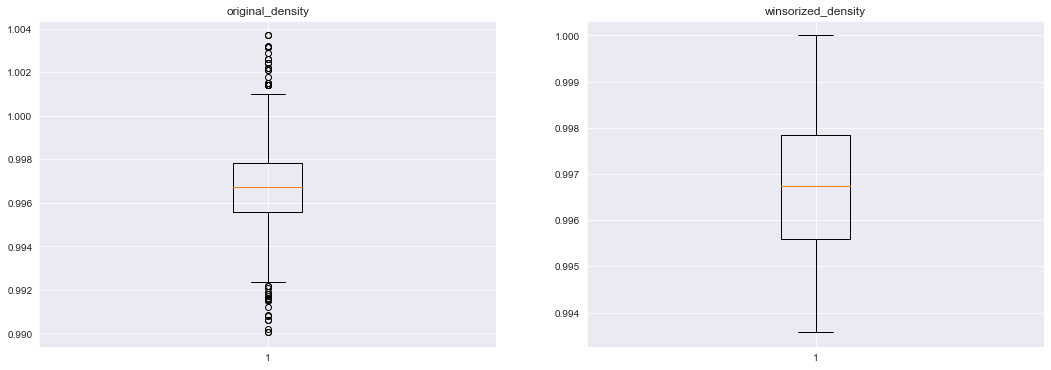

In [27]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_density = wine_df['density']
plt.boxplot(original_density)
plt.title("original_density")

plt.subplot(1,2,2)
winsorized_density = winsorize(wine_df['density'], (0.05, 0.05))
plt.boxplot(winsorized_density)
plt.title("winsorized_density")

plt.show()

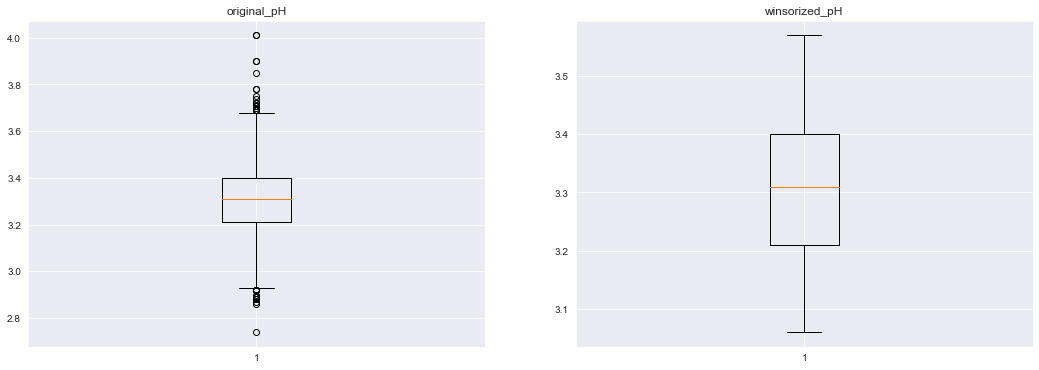

In [28]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_pH = wine_df['pH']
plt.boxplot(original_pH)
plt.title("original_pH")

plt.subplot(1,2,2)
winsorized_pH = winsorize(wine_df['pH'], (0.05, 0.05))
plt.boxplot(winsorized_pH)
plt.title("winsorized_pH")

plt.show()

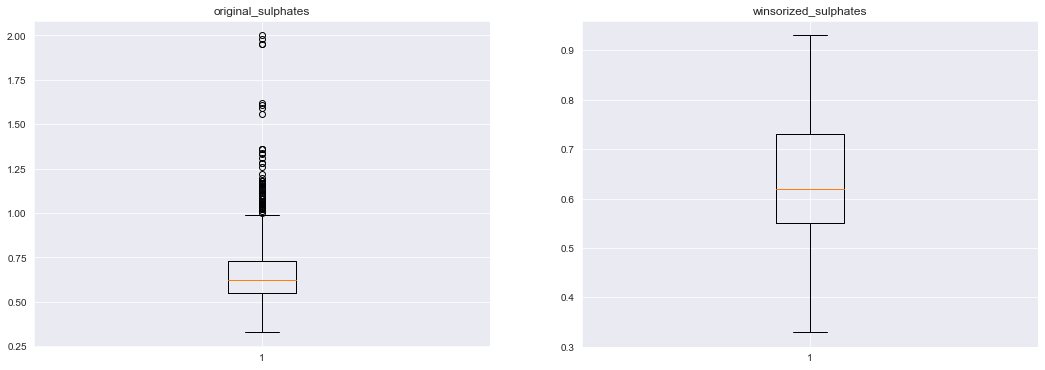

In [29]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_sulphates = wine_df['sulphates']
plt.boxplot(original_sulphates)
plt.title("original_sulphates")

plt.subplot(1,2,2)
winsorized_sulphates = winsorize(wine_df['sulphates'], (0.0, 0.05))
plt.boxplot(winsorized_sulphates)
plt.title("winsorized_sulphates")

plt.show()

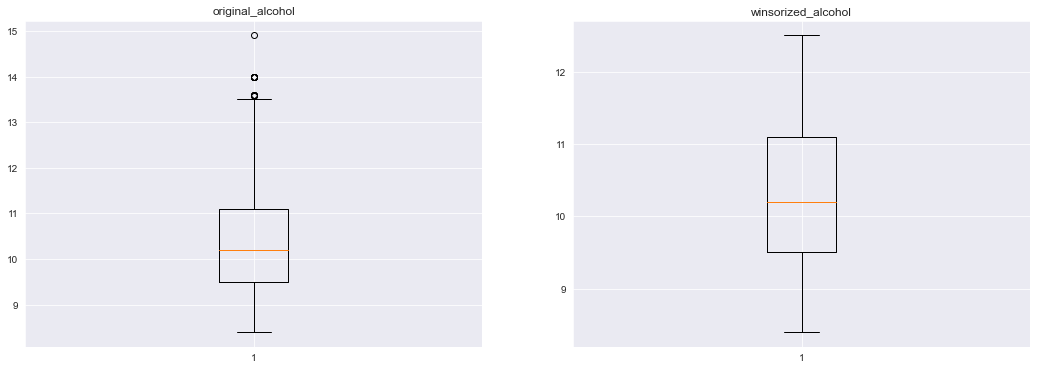

In [30]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_alcohol = wine_df['alcohol']
plt.boxplot(original_alcohol)
plt.title("original_alcohol")

plt.subplot(1,2,2)
winsorized_alcohol = winsorize(wine_df['alcohol'], (0.0, 0.05))
plt.boxplot(winsorized_alcohol)
plt.title("winsorized_alcohol")

plt.show()

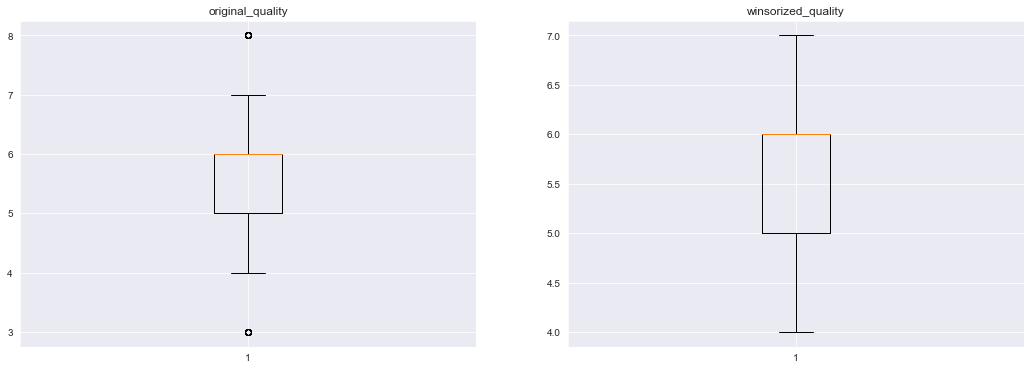

In [31]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_quality = wine_df['quality']
plt.boxplot(original_quality)
plt.title("original_quality")

plt.subplot(1,2,2)
winsorized_quality= winsorize(wine_df['quality'], (0.01, 0.05))
plt.boxplot(winsorized_quality)
plt.title("winsorized_quality")

plt.show()

In [32]:
# Check number of Outliers after Winsorization for each variable.


winsorized_list = [winsorized_fixed_acidity, winsorized_volatile_acidity, winsorized_citric_acid, winsorized_residual_sugar, winsorized_free_sulfur_dioxide, winsorized_total_sulfur_dioxide,  
winsorized_density, winsorized_pH, winsorized_sulphates, winsorized_alcohol]
for var_win in winsorized_list:
    q75, q25 = np.percentile(var_win, [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    print("Number of outliers after winsorization : {}".format(len(np.where((var_win > max_val) | (var_win < min_val))[0])))

Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0


In [33]:
# Adding winsorized variables to the data frame.

wine_df['winsorized_fixed_acidity'] =  winsorized_fixed_acidity
wine_df['winsorized_volatile_acidity'] =  winsorized_volatile_acidity
wine_df['winsorized_citric_acid'] =  winsorized_citric_acid
wine_df['winsorized_residual_sugar'] =  winsorized_residual_sugar
wine_df['winsorized_chlorides'] =  winsorized_chlorides
wine_df['winsorized_free_sulfur_dioxide'] =  winsorized_free_sulfur_dioxide
wine_df['winsorized_total_sulfur_dioxide'] =  winsorized_total_sulfur_dioxide
wine_df['winsorized_density'] =  winsorized_density
wine_df['winsorized_pH'] =  winsorized_pH
wine_df['winsorized_sulphates'] =  winsorized_sulphates
wine_df['winsorized_alcohol'] =  winsorized_alcohol

# 5.Univariate Analysis

In [34]:
winsorized_df = wine_df[['winsorized_fixed_acidity', 'winsorized_volatile_acidity', 'winsorized_citric_acid', 'winsorized_residual_sugar','winsorized_chlorides', 'winsorized_free_sulfur_dioxide', 'winsorized_total_sulfur_dioxide',  
'winsorized_density', 'winsorized_pH', 'winsorized_sulphates', 'winsorized_alcohol']]
winsorized_df.describe()
winsorized_df.shape
winsorized_df.columns

Index(['winsorized_fixed_acidity', 'winsorized_volatile_acidity',
       'winsorized_citric_acid', 'winsorized_residual_sugar',
       'winsorized_chlorides', 'winsorized_free_sulfur_dioxide',
       'winsorized_total_sulfur_dioxide', 'winsorized_density',
       'winsorized_pH', 'winsorized_sulphates', 'winsorized_alcohol'],
      dtype='object')

In [35]:
# Extracting our target variable and creating feature list of dependant variables
target = 'quality'
features_list = list(winsorized_df.columns)

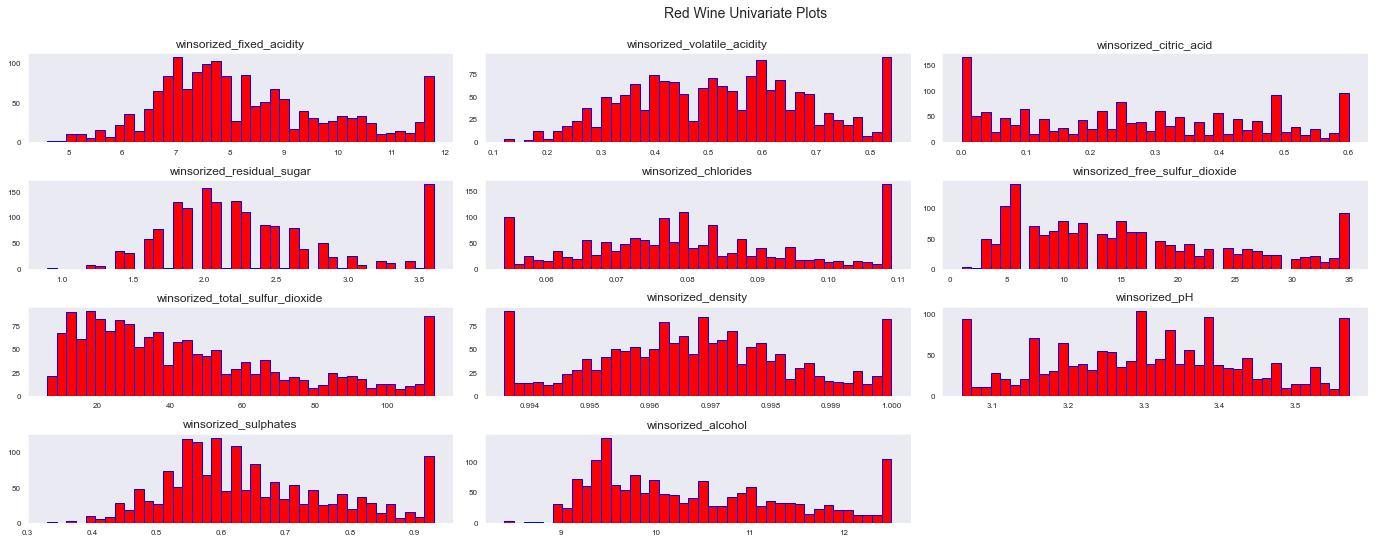

In [36]:
wine_df[features_list].hist(bins=40, edgecolor='b', linewidth=1.0,
                          xlabelsize=8, ylabelsize=8, grid=False, 
                          figsize=(16,6), color='red')    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
plt.suptitle('Red Wine Univariate Plots', x=0.65, y=1.25, fontsize=14);

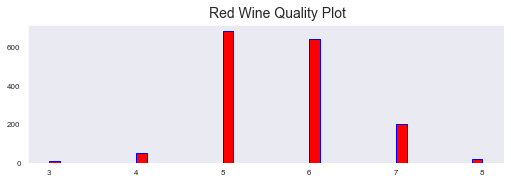

In [37]:
wine_df[target].hist(bins=40, edgecolor='b', linewidth=1.0,
              xlabelsize=8, ylabelsize=8, grid=False, figsize=(6,2), color='red')    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
plt.suptitle('Red Wine Quality Plot', x=0.65, y=1.25, fontsize=14);  

# Bivariate Analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='quality', ylabel='winsorized_fixed_acidity'>

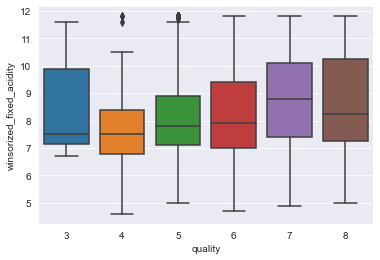

In [38]:
#Target variable is Quality. So will plot a boxplot each column against target variable
sns.boxplot('quality', 'winsorized_fixed_acidity', data = wine_df)

<AxesSubplot:xlabel='quality', ylabel='winsorized_fixed_acidity'>

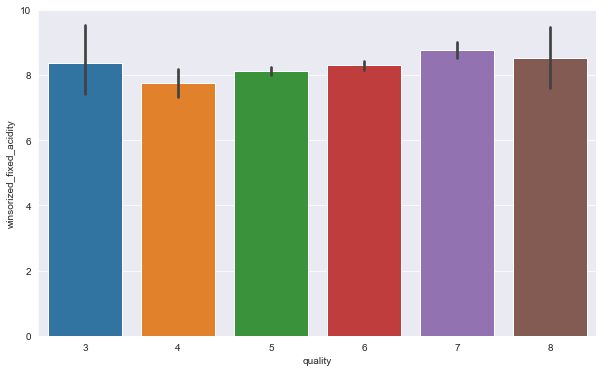

In [39]:
#Alcohol level also goes higher as te quality of wine increases
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'winsorized_fixed_acidity', data = wine_df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='quality', ylabel='winsorized_volatile_acidity'>

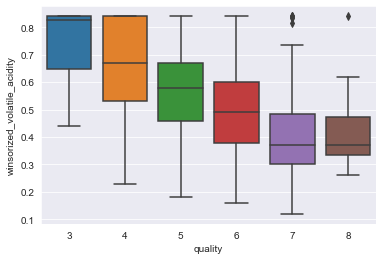

In [40]:
#Target variable is Quality. So will plot a boxplot each column against target variable
sns.boxplot('quality', 'winsorized_volatile_acidity', data = wine_df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='quality', ylabel='winsorized_volatile_acidity'>

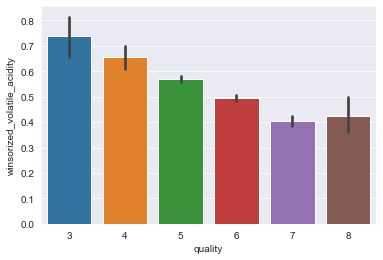

In [41]:
sns.barplot('quality', 'winsorized_volatile_acidity', data = wine_df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='quality', ylabel='winsorized_citric_acid'>

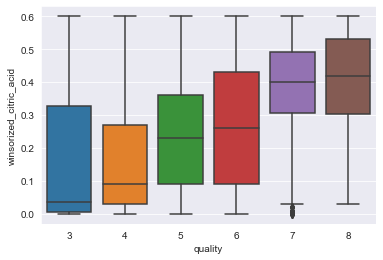

In [42]:
#Target variable is Quality. So will plot a boxplot each column against target variable
sns.boxplot('quality', 'winsorized_citric_acid', data = wine_df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='quality', ylabel='winsorized_citric_acid'>

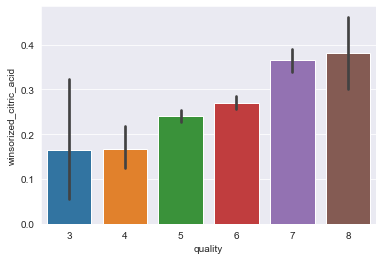

In [43]:
sns.barplot('quality', 'winsorized_citric_acid', data = wine_df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='quality', ylabel='winsorized_residual_sugar'>

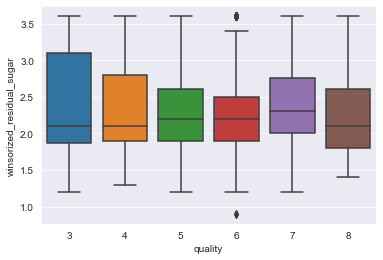

In [44]:
#Target variable is Quality. So will plot a boxplot each column against target variable
sns.boxplot('quality', 'winsorized_residual_sugar', data = wine_df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='quality', ylabel='winsorized_residual_sugar'>

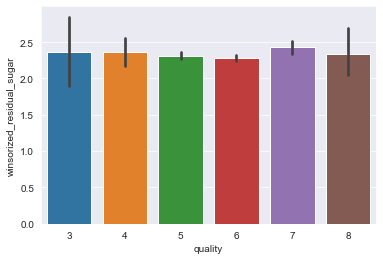

In [45]:
sns.barplot('quality', 'winsorized_residual_sugar', data = wine_df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='quality', ylabel='winsorized_chlorides'>

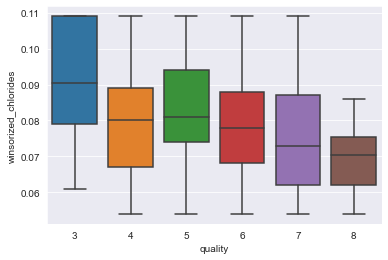

In [46]:
#Target variable is Quality. So will plot a boxplot each column against target variable
sns.boxplot('quality', 'winsorized_chlorides', data = wine_df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='quality', ylabel='winsorized_chlorides'>

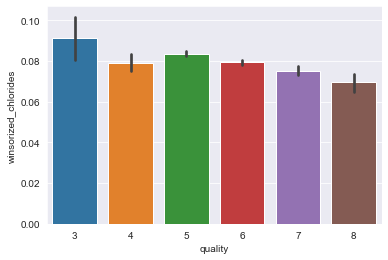

In [47]:
sns.barplot('quality', 'winsorized_chlorides', data = wine_df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='quality', ylabel='winsorized_free_sulfur_dioxide'>

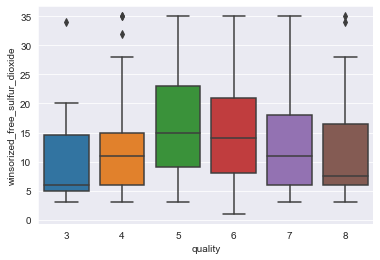

In [48]:
#Target variable is Quality. So will plot a boxplot each column against target variable
sns.boxplot('quality', 'winsorized_free_sulfur_dioxide', data = wine_df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='quality', ylabel='winsorized_free_sulfur_dioxide'>

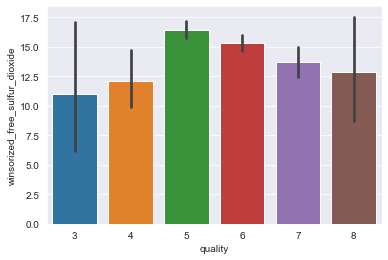

In [49]:
sns.barplot('quality', 'winsorized_free_sulfur_dioxide', data = wine_df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='quality', ylabel='winsorized_total_sulfur_dioxide'>

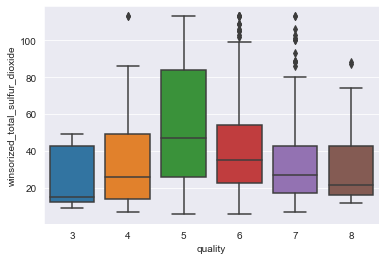

In [50]:
#Target variable is Quality. So will plot a boxplot each column against target variable
sns.boxplot('quality', 'winsorized_total_sulfur_dioxide', data = wine_df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='quality', ylabel='winsorized_density'>

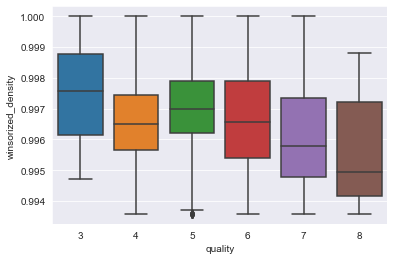

In [51]:
#Target variable is Quality. So will plot a boxplot each column against target variable
sns.boxplot('quality', 'winsorized_density', data = wine_df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='quality', ylabel='winsorized_density'>

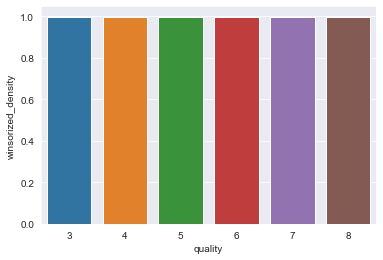

In [52]:
sns.barplot('quality', 'winsorized_density', data = wine_df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='quality', ylabel='winsorized_pH'>

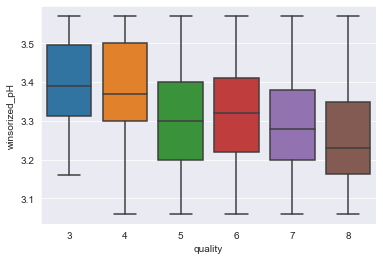

In [53]:
#Target variable is Quality. So will plot a boxplot each column against target variable
sns.boxplot('quality', 'winsorized_pH', data = wine_df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='quality', ylabel='winsorized_pH'>

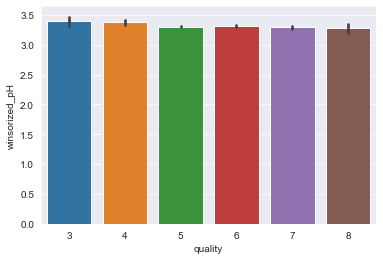

In [54]:
sns.barplot('quality', 'winsorized_pH', data = wine_df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='quality', ylabel='winsorized_sulphates'>

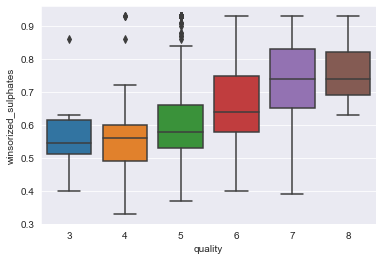

In [55]:
#Target variable is Quality. So will plot a boxplot each column against target variable
sns.boxplot('quality', 'winsorized_sulphates', data = wine_df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='quality', ylabel='winsorized_sulphates'>

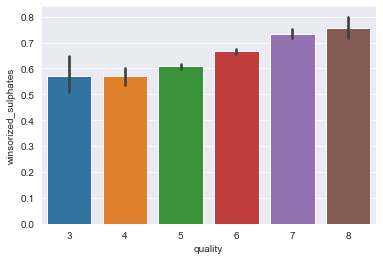

In [56]:
sns.barplot('quality', 'winsorized_sulphates', data = wine_df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='quality', ylabel='winsorized_alcohol'>

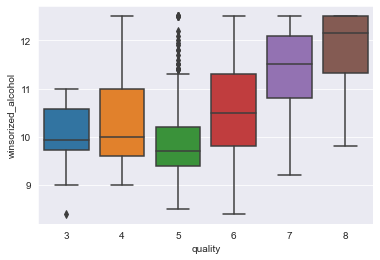

In [57]:
#Target variable is Quality. So will plot a boxplot each column against target variable
sns.boxplot('quality', 'winsorized_alcohol', data = wine_df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='quality', ylabel='winsorized_alcohol'>

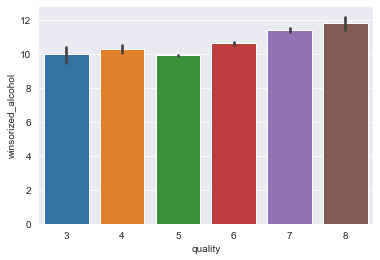

In [58]:
sns.barplot('quality', 'winsorized_alcohol', data = wine_df)

# 6.Correlation Coefficient

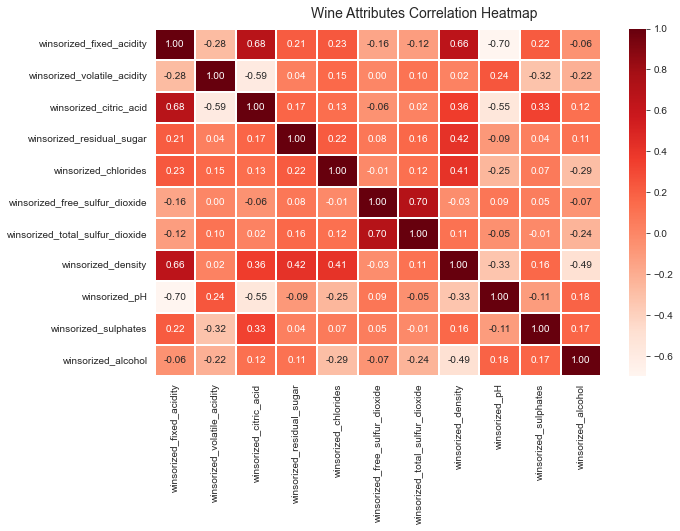

In [59]:
# for visualizing correlations
f, ax = plt.subplots(figsize=(10, 6))
corr = winsorized_df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="Reds",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Wine Attributes Correlation Heatmap', fontsize=14)

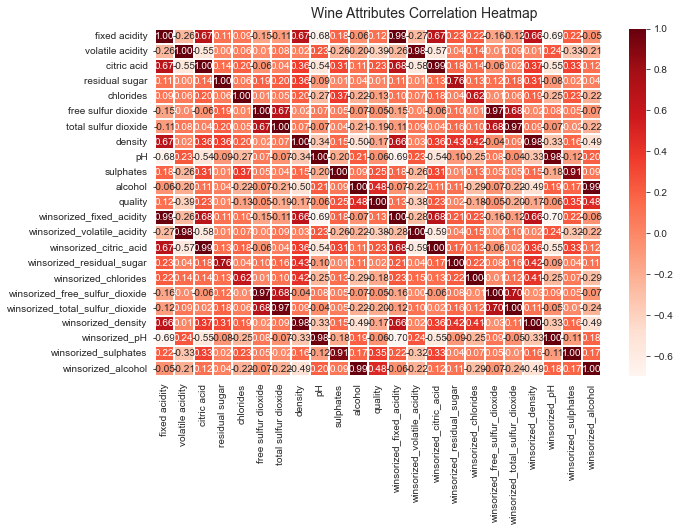

In [60]:
# for visualizing correlations
f, ax = plt.subplots(figsize=(10, 6))
corr = wine_df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="Reds",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Wine Attributes Correlation Heatmap', fontsize=14)

# 7. Create a new target "Reviews"

In [61]:
# create a new column 'Review' with the values of 0 and 1 


reviews = []
for i in wine_df['quality']:
    if i <= 5:
        reviews.append('0')
    else:
        reviews.append('1')

winsorized_df['Reviews'] = reviews
winsorized_df.head(10)

C:\Users\Arun\AppData\Local\Temp/ipykernel_6752/325184248.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



winsorized_fixed_acidity  winsorized_volatile_acidity  \
0                       7.4                         0.70   
1                       7.8                         0.84   
2                       7.8                         0.76   
3                      11.2                         0.28   
4                       7.4                         0.70   
5                       7.4                         0.66   
6                       7.9                         0.60   
7                       7.3                         0.65   
8                       7.8                         0.58   
9                       7.5                         0.50   

   winsorized_citric_acid  winsorized_residual_sugar  winsorized_chlorides  \
0                    0.00                        1.9                 0.076   
1                    0.00                        2.6                 0.098   
2                    0.04                        2.3                 0.092   
3                    0.56                        1.9                 0.075   
4                    0.00                        1.9                 0.076   
5                    0.00                        1.8                 0.075   
6                    0.06                        1.6                 0.069   
7                    0.00                        1.2                 0.065   
8                    0.02                        2.0                 0.073   
9                    0.36                        3.6                 0.071   

   winsorized_free_sulfur_dioxide  winsorized_total_sulfur_dioxide  \
0                            11.0                             34.0   
1                            25.0                             67.0   
2                            15.0                             54.0   
3                            17.0                             60.0   
4                            11.0                             34.0   
5                            13.0                             40.0   
6                            15.0                             59.0   
7                            15.0                             21.0   
8                             9.0                             18.0   
9                            17.0                            102.0   

   winsorized_density  winsorized_pH  winsorized_sulphates  \
0              0.9978           3.51                  0.56   
1              0.9968           3.20                  0.68   
2              0.9970           3.26                  0.65   
3              0.9980           3.16                  0.58   
4              0.9978           3.51                  0.56   
5              0.9978           3.51                  0.56   
6              0.9964           3.30                  0.46   
7              0.9946           3.39                  0.47   
8              0.9968           3.36                  0.57   
9              0.9978           3.35                  0.80   

   winsorized_alcohol Reviews  
0                 9.4       0  
1                 9.8       0  
2                 9.8       0  
3                 9.8       1  
4                 9.4       0  
5                 9.4       0  
6                 9.4       0  
7                10.0       1  
8                 9.5       1  
9                10.5       0

In [62]:
winsorized_df.columns

Index(['winsorized_fixed_acidity', 'winsorized_volatile_acidity',
       'winsorized_citric_acid', 'winsorized_residual_sugar',
       'winsorized_chlorides', 'winsorized_free_sulfur_dioxide',
       'winsorized_total_sulfur_dioxide', 'winsorized_density',
       'winsorized_pH', 'winsorized_sulphates', 'winsorized_alcohol',
       'Reviews'],
      dtype='object')

In [63]:
winsorized_df['Reviews'].unique()

array(['0', '1'], dtype=object)

In [64]:
Counter(winsorized_df['Reviews'])

Counter({'0': 744, '1': 855})

In [65]:
winsorized_df.shape

(1599, 12)

In [66]:
x = winsorized_df.iloc[:,:11]
y = winsorized_df['Reviews']

# 8. Model - Machine Learning
<b>We will start modelling the data. For this Capstone we will try the following models.</b>

- A. Logistic Regression
- B. Decision Trees
- C. Random Forests
- D. SVM
- E. SVC linear kernel
- F. Stochastic Gradient Descent
- G. KNN

<b> We will start with splitting the data</b>

In [67]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [68]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1199, 11)
(1199,)
(400, 11)
(400,)


# A. Logistic Regression

## (i). penalty = 'none'

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
lr = LogisticRegression(solver='lbfgs', penalty='none', max_iter=10000, random_state=2)
lr.fit(x_train, y_train)
lr_predict = lr.predict(x_test)
print(classification_report(y_test, lr_predict))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71       195
           1       0.72      0.75      0.74       205

    accuracy                           0.72       400
   macro avg       0.72      0.72      0.72       400
weighted avg       0.72      0.72      0.72       400



In [70]:
test_score = lr.score(x_test, y_test)
train_score = lr.score(x_train, y_train)

print('Score on training data: ', train_score)
print('Score on test data: ', test_score)

Score on training data:  0.7589658048373644
Score on test data:  0.7225


In [71]:
#print confusion matrix and accuracy score
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score_1 = accuracy_score(y_test, lr_predict)


In [72]:
print(lr_conf_matrix)


[[135  60]
 [ 51 154]]


In [73]:
print(lr_acc_score_1*100)

72.25


In [74]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

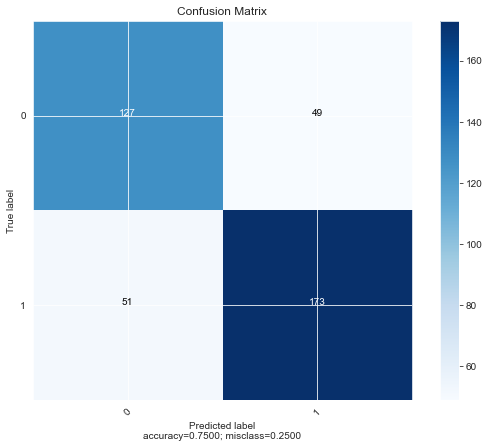

In [75]:
plot_confusion_matrix(cm           = np.array([[127, 49], [51, 173]]), 
                      normalize    = False,
                      target_names = ['0', '1'],
                      title        = "Confusion Matrix")

## (ii). penalty='l2'

In [76]:
lr_regularized = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=10000, random_state=2)
lr_regularized.fit(x_train, y_train)
lr_regularized_predict = lr_regularized.predict(x_test)
print(classification_report(y_test, lr_regularized_predict))

              precision    recall  f1-score   support

           0       0.72      0.68      0.70       195
           1       0.71      0.75      0.73       205

    accuracy                           0.71       400
   macro avg       0.71      0.71      0.71       400
weighted avg       0.71      0.71      0.71       400



In [77]:
#print confusion matrix and accuracy score
lr_conf_matrix = confusion_matrix(y_test, lr_regularized_predict)
lr_acc_score = accuracy_score(y_test, lr_regularized_predict)
print(lr_conf_matrix)
print(lr_acc_score*100)

[[132  63]
 [ 52 153]]
71.25


# B. Decision Trees

## (i). criterion = 'gini'

In [78]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_predict = dt.predict(x_test)
print(classification_report(y_test, dt_predict))

              precision    recall  f1-score   support

           0       0.76      0.68      0.72       195
           1       0.72      0.80      0.76       205

    accuracy                           0.74       400
   macro avg       0.74      0.74      0.74       400
weighted avg       0.74      0.74      0.74       400



In [79]:
#print confusion matrix and accuracy score
dt_conf_matrix = confusion_matrix(y_test, dt_predict)
dt_acc_score = accuracy_score(y_test, dt_predict)
print(dt_conf_matrix)
print(dt_acc_score*100)

[[132  63]
 [ 41 164]]
74.0


## (ii). criterion = 'entropy'

In [80]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy')
dt.fit(x_train,y_train)
dt_predict = dt.predict(x_test)
print(classification_report(y_test, dt_predict))

              precision    recall  f1-score   support

           0       0.79      0.71      0.75       195
           1       0.75      0.82      0.78       205

    accuracy                           0.77       400
   macro avg       0.77      0.76      0.76       400
weighted avg       0.77      0.77      0.76       400



In [81]:
#print confusion matrix and accuracy score
dt_conf_matrix = confusion_matrix(y_test, dt_predict)
dt_acc_score_2 = accuracy_score(y_test, dt_predict)
print(dt_conf_matrix)
print(dt_acc_score_2*100)

[[138  57]
 [ 37 168]]
76.5


# C. Random Forests

## (i). criterion = 'gini'

In [82]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_predict=rf.predict(x_test)
print(classification_report(y_test, rf_predict))

              precision    recall  f1-score   support

           0       0.80      0.71      0.75       195
           1       0.75      0.83      0.79       205

    accuracy                           0.77       400
   macro avg       0.78      0.77      0.77       400
weighted avg       0.77      0.77      0.77       400



In [83]:
#print confusion matrix and accuracy score
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print(rf_conf_matrix)
print(rf_acc_score*100)

[[139  56]
 [ 35 170]]
77.25


Feature: 0, Score: 0.06399
Feature: 1, Score: 0.11594
Feature: 2, Score: 0.06720
Feature: 3, Score: 0.04953
Feature: 4, Score: 0.06670
Feature: 5, Score: 0.06135
Feature: 6, Score: 0.09695
Feature: 7, Score: 0.08615
Feature: 8, Score: 0.05926
Feature: 9, Score: 0.12891
Feature: 10, Score: 0.20403


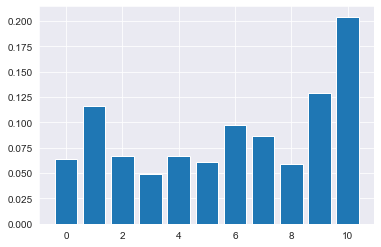

In [84]:
# get importance
importance = rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# "Alcohol seems like the important variable"
(ii). criterion = 'entropy'

In [85]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion = 'entropy')
rf.fit(x_train, y_train)
rf_predict=rf.predict(x_test)
print(classification_report(y_test, rf_predict))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77       195
           1       0.76      0.84      0.80       205

    accuracy                           0.79       400
   macro avg       0.79      0.78      0.78       400
weighted avg       0.79      0.79      0.78       400



In [86]:
#print confusion matrix and accuracy score
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score_2 = accuracy_score(y_test, rf_predict)
print(rf_conf_matrix)
print(rf_acc_score_2*100)

[[142  53]
 [ 33 172]]
78.5


Feature: 0, Score: 0.07332
Feature: 1, Score: 0.10399
Feature: 2, Score: 0.06746
Feature: 3, Score: 0.05442
Feature: 4, Score: 0.07551
Feature: 5, Score: 0.06606
Feature: 6, Score: 0.10213
Feature: 7, Score: 0.09087
Feature: 8, Score: 0.06325
Feature: 9, Score: 0.12095
Feature: 10, Score: 0.18203


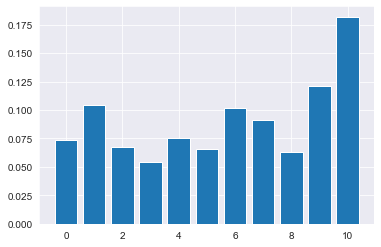

In [87]:
# get importance
importance = rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# D. SVM Classifier

## (i). kernel = 'rbf'

In [88]:
from sklearn.svm import SVC
lin_svc = SVC()
lin_svc.fit(x_train, y_train)
lin_svc_predict=rf.predict(x_test)
print(classification_report(y_test, lin_svc_predict))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77       195
           1       0.76      0.84      0.80       205

    accuracy                           0.79       400
   macro avg       0.79      0.78      0.78       400
weighted avg       0.79      0.79      0.78       400



In [89]:
#print confusion matrix and accuracy score
lin_svc_conf_matrix = confusion_matrix(y_test, lin_svc_predict)
lin_svc_acc_score = accuracy_score(y_test, lin_svc_predict)
print(lin_svc_conf_matrix)
print(lin_svc_acc_score*100)

[[142  53]
 [ 33 172]]
78.5


## (ii). kernel = 'poly'

In [90]:
from sklearn.svm import SVC
lin_svc = SVC(kernel='poly')
lin_svc.fit(x_train, y_train)
lin_svc_predict=rf.predict(x_test)
print(classification_report(y_test, lin_svc_predict))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77       195
           1       0.76      0.84      0.80       205

    accuracy                           0.79       400
   macro avg       0.79      0.78      0.78       400
weighted avg       0.79      0.79      0.78       400



In [91]:
#print confusion matrix and accuracy score
lin_svc_conf_matrix = confusion_matrix(y_test, lin_svc_predict)
lin_svc_acc_score_2 = accuracy_score(y_test, lin_svc_predict)
print(lin_svc_conf_matrix)
print(lin_svc_acc_score_2*100)

[[142  53]
 [ 33 172]]
78.5


Feature: 0, Score: 0.07332
Feature: 1, Score: 0.10399
Feature: 2, Score: 0.06746
Feature: 3, Score: 0.05442
Feature: 4, Score: 0.07551
Feature: 5, Score: 0.06606
Feature: 6, Score: 0.10213
Feature: 7, Score: 0.09087
Feature: 8, Score: 0.06325
Feature: 9, Score: 0.12095
Feature: 10, Score: 0.18203


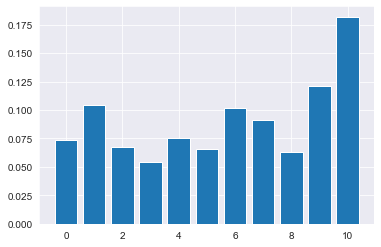

In [92]:
# get importance
importance = rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## (iii). kernel = 'sigmoid'

In [93]:
from sklearn.svm import SVC
lin_svc = SVC(kernel='sigmoid')
lin_svc.fit(x_train, y_train)
lin_svc_predict=rf.predict(x_test)
print(classification_report(y_test, lin_svc_predict))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77       195
           1       0.76      0.84      0.80       205

    accuracy                           0.79       400
   macro avg       0.79      0.78      0.78       400
weighted avg       0.79      0.79      0.78       400



In [94]:
#print confusion matrix and accuracy score
lin_svc_conf_matrix = confusion_matrix(y_test, lin_svc_predict)
lin_svc_acc_score = accuracy_score(y_test, lin_svc_predict)
print(lin_svc_conf_matrix)
print(lin_svc_acc_score*100)

[[142  53]
 [ 33 172]]
78.5


## (iv). kernel = 'linear'

In [95]:
rbf_svc = SVC(kernel='linear')
rbf_svc.fit(x_train, y_train)
rbf_svc_predict=rf.predict(x_test)
print(classification_report(y_test, rbf_svc_predict))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77       195
           1       0.76      0.84      0.80       205

    accuracy                           0.79       400
   macro avg       0.79      0.78      0.78       400
weighted avg       0.79      0.79      0.78       400



In [96]:
rbf_svc_conf_matrix = confusion_matrix(y_test, rbf_svc_predict)
rbf_svc_acc_score = accuracy_score(y_test, rbf_svc_predict)
print(rbf_svc_conf_matrix)
print(rbf_svc_acc_score*100)

[[142  53]
 [ 33 172]]
78.5


# E. Stochastic Gradient Descent

## (i). penalty=None

In [97]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
sgd = SGDClassifier(penalty=None)
sgd.fit(x_train, y_train)
sgd_predict = sgd.predict(x_test)
print(classification_report(y_test, sgd_predict))


              precision    recall  f1-score   support

           0       0.72      0.63      0.67       195
           1       0.69      0.77      0.73       205

    accuracy                           0.70       400
   macro avg       0.71      0.70      0.70       400
weighted avg       0.70      0.70      0.70       400



In [98]:
sgd_conf_matrix = confusion_matrix(y_test, sgd_predict)
sgd_acc_score_1 = accuracy_score(y_test, sgd_predict)
print(sgd_conf_matrix)
print(sgd_acc_score_1*100)

[[123  72]
 [ 47 158]]
70.25


# (ii). penalty=l1

In [99]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
sgd = SGDClassifier(penalty= 'l1')
sgd.fit(x_train, y_train)
sgd_predict = sgd.predict(x_test)
print(classification_report(y_test, sgd_predict))

              precision    recall  f1-score   support

           0       0.65      0.31      0.42       195
           1       0.56      0.84      0.67       205

    accuracy                           0.58       400
   macro avg       0.61      0.58      0.55       400
weighted avg       0.60      0.58      0.55       400



In [100]:
sgd_conf_matrix = confusion_matrix(y_test, sgd_predict)
sgd_acc_score_2 = accuracy_score(y_test, sgd_predict)
print(sgd_conf_matrix)
print(sgd_acc_score_2*100)

[[ 61 134]
 [ 33 172]]
58.25


# (iii). penality = l2

In [101]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
sgd = SGDClassifier(penalty= 'l2')
sgd.fit(x_train, y_train)
sgd_predict = sgd.predict(x_test)
print(classification_report(y_test, sgd_predict))

              precision    recall  f1-score   support

           0       0.72      0.62      0.66       195
           1       0.68      0.77      0.72       205

    accuracy                           0.69       400
   macro avg       0.70      0.69      0.69       400
weighted avg       0.70      0.69      0.69       400



In [102]:
sgd_conf_matrix = confusion_matrix(y_test, sgd_predict)
sgd_acc_score = accuracy_score(y_test, sgd_predict)
print(sgd_conf_matrix)
print(sgd_acc_score*100)

[[120  75]
 [ 47 158]]
69.5


# (iv). penalty= 'elasticnet'

In [103]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
sgd = SGDClassifier(penalty= 'elasticnet')
sgd.fit(x_train, y_train)
sgd_predict = sgd.predict(x_test)
print(classification_report(y_test, sgd_predict))

              precision    recall  f1-score   support

           0       0.55      0.90      0.69       195
           1       0.77      0.31      0.44       205

    accuracy                           0.60       400
   macro avg       0.66      0.60      0.56       400
weighted avg       0.66      0.60      0.56       400



In [104]:
sgd_conf_matrix = confusion_matrix(y_test, sgd_predict)
sgd_acc_score = accuracy_score(y_test, sgd_predict)
print(sgd_conf_matrix)
print(sgd_acc_score*100)

[[176  19]
 [142  63]]
59.75


# F. KNN

## (i). weights = 'uniform'

In [105]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn_predict = knn.predict(x_test)
print(classification_report(y_test, knn_predict))

              precision    recall  f1-score   support

           0       0.68      0.62      0.65       195
           1       0.66      0.72      0.69       205

    accuracy                           0.67       400
   macro avg       0.67      0.67      0.67       400
weighted avg       0.67      0.67      0.67       400



In [106]:
knn_conf_matrix = confusion_matrix(y_test, knn_predict)
knn_acc_score = accuracy_score(y_test, knn_predict)
print(knn_conf_matrix)
print(knn_acc_score*100)

[[120  75]
 [ 57 148]]
67.0


## (ii). weights = ' distance'

In [107]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(weights = 'distance')
knn.fit(x_train, y_train)
knn_predict = knn.predict(x_test)
print(classification_report(y_test, knn_predict))

              precision    recall  f1-score   support

           0       0.75      0.67      0.70       195
           1       0.71      0.79      0.75       205

    accuracy                           0.73       400
   macro avg       0.73      0.73      0.73       400
weighted avg       0.73      0.73      0.73       400



In [108]:
knn_conf_matrix = confusion_matrix(y_test, knn_predict)
knn_acc_score_2 = accuracy_score(y_test, knn_predict)
print(knn_conf_matrix)
print(knn_acc_score_2*100)

[[130  65]
 [ 44 161]]
72.75


# 8. Visualizing Model Performance

In [109]:
models = [('Logistic Regression', lr_acc_score),
          ('Decision Trees', dt_acc_score_2),
          ('Random Forest', rf_acc_score_2),
          ('SVM', lin_svc_acc_score_2),
          ('Stochastic Gradient Descent', sgd_acc_score_2),
          ('KNN', knn_acc_score_2)
         ]

In [110]:
accuracy_vis_pd = pd.DataFrame(data = models, columns=['Model', 'Accuracy(test)'])
accuracy_vis_pd

Model  Accuracy(test)
0          Logistic Regression          0.7125
1               Decision Trees          0.7650
2                Random Forest          0.7850
3                          SVM          0.7850
4  Stochastic Gradient Descent          0.5825
5                          KNN          0.7275

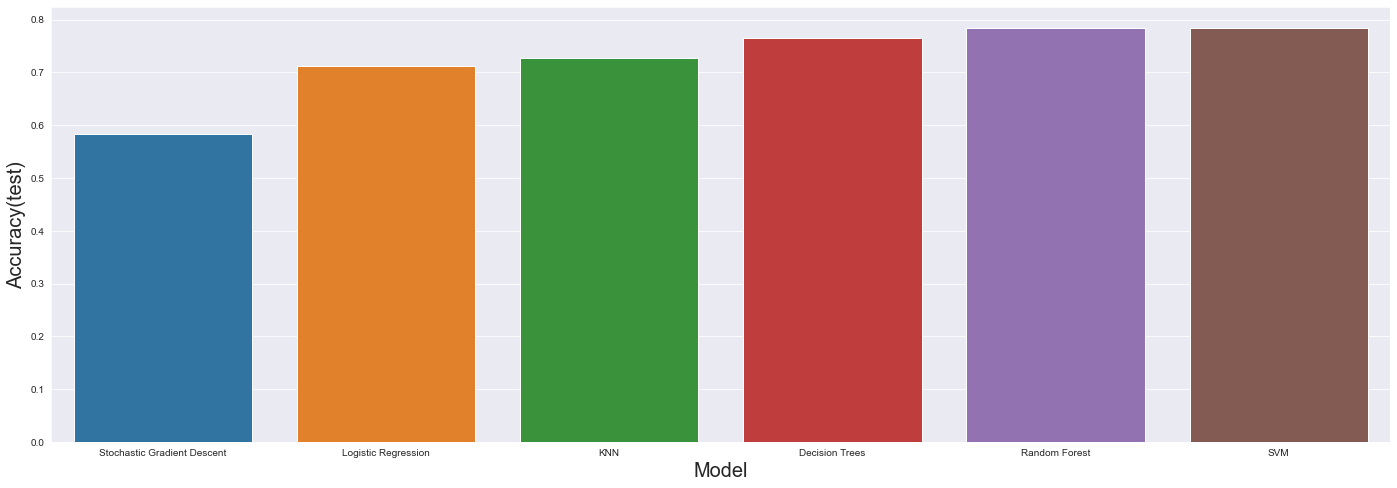

In [111]:
accuracy_vis_pd.sort_values(by=(['Accuracy(test)']), ascending=True, inplace=True)

f, axe = plt.subplots(1,1, figsize=(24,8))
sns.barplot(x = 'Model', y='Accuracy(test)',data = accuracy_vis_pd, ax = axe)
axe.set_xlabel('Model', size=20)
axe.set_ylabel('Accuracy(test)', size=20)

plt.show()

### The top three machine learning models for the current dataset are the following
            - 1.SVM ------------ 78.5%
            - 2.Random Forest--- 78.5%
            - 3.Decision Trees-- 76.5%

## 9. Conclusions:

- The red wine data was analyzed for quality with various physiochemical properties to identify what makes a ‘good’ wine.
    
- It was found that quality of the wine is mostly correlated to <b>alcohol</b>

- Data was split into training and test set. Machine learning models were trained in training set and tested for accuracy on the test set.

- <b>SVM model and Random Forest </b> does the best with an accuracy of 78.5%

- Machine learning also conclude that <b>“alcohol”</b> is the most important variable that determines the quality of wine

- <b>Future Scope:</b> ML models accuracy is not high. The low prevalence of quality levels 3, 4 and 8 and the large distribution overlapping area stratified by quality is a reason. We do not have information about the composition of grape varieties in each wine, the mix of experts that evaluated wine quality, or the production year. Lack of information about how the dataset was created may impact the prediction of quality using the physicochemical properties as predictors.